In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [3]:
!unzip -q "/content/new-plant-diseases-dataset.zip"

In [4]:
import cv2
import os
def load_images_from_folder1(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(0)
    print("All labels and images are loaded successfully Cherry Powdery Mildew with label 0")

    return images, image_id
Cherry_Powdery_Mildew_image,Cherry_Powdery_Mildew_label= load_images_from_folder1('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___Powdery_mildew')

All labels and images are loaded successfully Cherry Powdery Mildew with label 0


In [5]:
import cv2
import os
def load_images_from_folder2(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(1)
    print("All labels and images are loaded successfully Cherry healthy with label 1")

    return images, image_id
Cherry_healthy_image,Cherry_healthy_label= load_images_from_folder2('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')

All labels and images are loaded successfully Cherry healthy with label 1


**Corn_(maize)___Cercospora label 6**

In [6]:
import numpy as np

Cherry_Powdery_Mildew_label= np.asarray(Cherry_Powdery_Mildew_label)
Cherry_healthy_label  = np.asarray(Cherry_healthy_label)


In [7]:


Cherry_Powdery_Mildew_array=np.asarray(Cherry_Powdery_Mildew_image)
Cherry_healthy_array=np.asarray(Cherry_healthy_image)


In [8]:
Meged_image = np.concatenate((

Cherry_Powdery_Mildew_array,
Cherry_healthy_array
), axis=0)


In [9]:
Meged_image.shape

(3325, 224, 224, 3)

In [10]:
import numpy as np
Meged_label = np.concatenate((
Cherry_Powdery_Mildew_label,
Cherry_healthy_label
), axis=0)

'''
,
Corn_Cercospora_label,
Corn_Common_Rust_label,
Corn_Leaf_Blight_label,
Corn_Healthy_label,
Grape_black_rot_label,
Grape_Esca_label,
Grape_Leaf_blight_label,
Grape_healthy_label,
Peach_bacterial_label,
Peach_healthy_label,
Potato_Early_blight_label,
Potato_Late_blight_label,
Potato_Healthy_label,
'''

Meged_label

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
label_final = to_categorical(Meged_label)
label_final

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [12]:
import sklearn.model_selection as model_selection
x_train, x_test, label_train, label_test = model_selection.train_test_split(Meged_image, label_final, test_size=0.20, random_state=42)

In [13]:
print(x_train.shape, x_test.shape, label_train.shape, label_test.shape)

(2660, 224, 224, 3) (665, 224, 224, 3) (2660, 2) (665, 2)


In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Input
import os

image_input1 = Input(shape=(224, 224, 3))

# Provide the local path to the weights file
weights_path = "/kaggle/input/densenet-weights/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5"  # Change if needed

model_1 = DenseNet121(input_tensor=image_input1, include_top=False, weights=weights_path)

# Freeze layers
for layer in model_1.layers:
    layer.trainable = False

#model_1.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from keras.layers import Dense, concatenate,Dropout,Conv2D,MaxPool2D,Flatten,GlobalAveragePooling2D
x = model_1.output
# Add two new convolutional layers
x = Conv2D(512, (3, 3), activation='relu',padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu',padding='same')(x)
#x = Conv2D(512,(3, 3), activation='relu', padding='same')(x)
# Add a max-pooling layer
#x = MaxPool2D((2, 2),strides=(2, 2))(x)
#x=Flatten()(x)
# Add a global average pooling layer
x = GlobalAveragePooling2D()(x)
custom_model_Densenet = Model(image_input1,x)
#custom_model_Densenet.summary()


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Input
image_input2 = Input(shape=(224, 224, 3))
weights_path='/kaggle/input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
model_2 = VGG16(input_tensor=image_input2, include_top=False, weights=weights_path)
#model_2.summary()
for layer in model_2.layers:
	layer.trainable = False
#model_2.summary()

In [ ]:
from keras.layers import Dense, concatenate,Dropout,Conv2D,MaxPool2D,Flatten,GlobalAveragePooling2D
from keras.models import Model
import tensorflow as tf
y = model_2.output
# Add two new convolutional layers
y = Conv2D(512, (3, 3),padding='same',activation='relu')(y)
y = Conv2D(512, (3, 3),padding='same',activation='relu')(y)
#y = Conv2D(512, (3, 3), activation='relu',padding='same')(y)
# Add a max-pooling layer
y = MaxPool2D((2, 2), strides=(2, 2))(y)
# Add a global average pooling layer
#y = GlobalAveragePooling2D()(y)
y=Flatten()(y)
custom_model_vgg16 = Model(image_input2,y)
#custom_model_vgg16.summary()

In [ ]:
from keras.layers import Dense, concatenate,Dropout,BatchNormalization
from keras.models import Model
last_layer_Densenet = custom_model_Densenet.get_layer('global_average_pooling2d').output
last_layer_vgg16 = custom_model_vgg16.get_layer('flatten').output
#last_layer1_543 = Dense(500, activation = 'relu')(last_layer_543)
combined = concatenate([last_layer_Densenet,last_layer_vgg16])
#x = BatchNormalization()(combined)
combined1=Dropout(0.5)(combined)
last_layer1 = Dense(2048, activation = 'relu')(combined1)
#last_layer2 = Dense(1024, activation = 'relu')(last_layer1)
combined2=Dropout(0.3)(last_layer1)
last_layer3 = Dense(512, activation = 'relu')(combined2)
#last_layer4 = Dense(256, activation = 'relu')(last_layer3)
combined3=Dropout(0.2)(last_layer3)
last_layer5 = Dense(128, activation = 'relu')(combined3)
#last_layer6 = Dense(64, activation = 'relu')(last_layer5)
#last_layer7 = Dense(38, activation = 'relu')(last_layer5)
#combined4=Dropout(0.25)(last_layer5)
out = Dense(19, activation='softmax', name='output')(last_layer5)
custom_model = Model([image_input1,image_input2],out)
#custom_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_10         │ (None, 230, 230, 3)    │              0 │ input_layer_6[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_10[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_11         │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_11[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 45,155,731 (172.26 MB)

 Trainable params: 23,403,539 (89.28 MB)

 Non-trainable params: 21,752,192 (82.98 MB)

In [ ]:
import keras
from keras import layers
opt = keras.optimizers.Adam(learning_rate=0.0001)
custom_model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
#custom_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print("x_train shape:", x_train.shape)  # Expected (samples, 224, 224, 3)
print("x_train1 shape:", x_train1.shape)  # Expected (samples, 224, 224, 3)
print("label_train shape:", label_train.shape)  # Expected (samples, 3)


x_train shape: (28068, 224, 224, 3)
x_train1 shape: (28068, 224, 224, 3)
label_train shape: (28068, 19)


In [ ]:
x_test = x_test.astype('float32')
x_test1 = x_test1.astype('float32')
label_test = label_test.astype('float32')


In [ ]:
x_train1 = x_train1.astype('float32')
x_train = x_train.astype('float32')
label_train = label_train.astype('float32')


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Model
from tensorflow.keras.preprocessing import image

# Define input shape and number of classes
input_shape = (224, 224, 3)
n_classes = 2

# Use the Functional API to build the model
inputs = layers.Input(shape=input_shape)
x = layers.BatchNormalization()(inputs)
x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(512, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

# Create the model
model_1 = Model(inputs=inputs, outputs=outputs)
model_1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 107, 107, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 20, 20, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       8,389,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             1

 Total params: 11,011,790 (42.01 MB)

 Trainable params: 11,011,784 (42.01 MB)

 Non-trainable params: 6 (24.00 B)

In [16]:
import keras
from keras import layers
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [17]:
# Train the Model
history = model_1.fit(x_train, label_train,
                    validation_data=(x_test, label_test),
                    epochs=20,  # Change based on training performance
                    batch_size=32,
                    verbose=1)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 229ms/step - accuracy: 0.7251 - loss: 0.4983 - val_accuracy: 0.9293 - val_loss: 0.2598
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9453 - loss: 0.1681 - val_accuracy: 0.9564 - val_loss: 0.1348
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9715 - loss: 0.0863 - val_accuracy: 0.9068 - val_loss: 0.3141
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9708 - loss: 0.0995 - val_accuracy: 0.9609 - val_loss: 0.1242
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9733 - loss: 0.0909 - val_accuracy: 0.9880 - val_loss: 0.0349
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9904 - loss: 0.0339 - val_accuracy: 0.9985 - val_loss: 0.0079
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9965 - loss: 0.0124 - val_accuracy: 0.9910 - val_loss: 0.0199
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 0.99

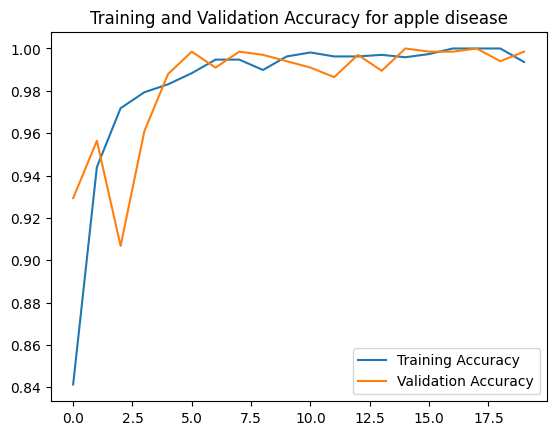

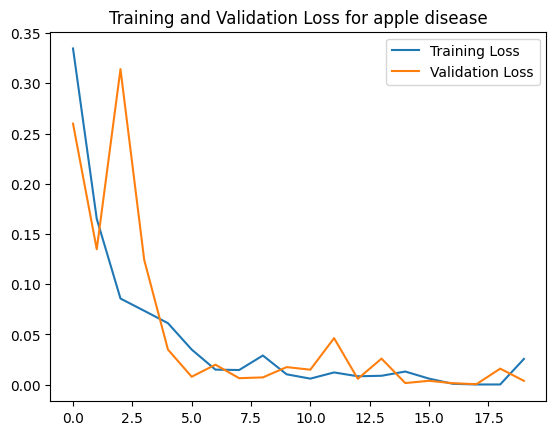

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
EPOCHS = 20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#plt.figure(figsize=(8,8))
#plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for apple disease')
#plt.subplot(1, 2, 2)
plt.show()
plt.savefig('AccVal_acc')
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for apple disease')
plt.show()
plt.savefig('LossVal_loss')

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = model_1.evaluate(x_test, label_test, verbose=1)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9980 - loss: 0.0058
Test Accuracy: 99.85%
Test Loss: 0.0038


In [20]:
from sklearn.metrics import classification_report
import numpy as np

# Get model predictions
y_pred = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class indices
y_true = np.argmax(label_test, axis=1)  # Convert one-hot to class indices

# Print Classification Report
print(classification_report(y_true, y_pred_classes))


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       299

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665



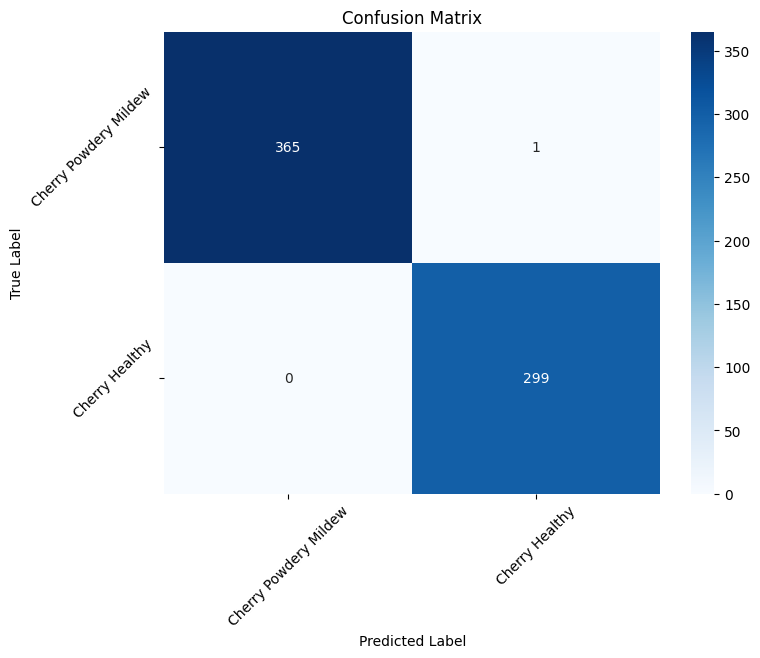

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_names = ["Cherry Powdery Mildew", "Cherry Healthy"]  # Replace with your actual class names

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)  # Rotate class labels for better readability
plt.yticks(rotation=45)
plt.show()


In [22]:
# Save the model in HDF5 format
model_1.save('/content/drive/MyDrive/crop_disease_models/cherry_disease_model.h5')
print("Model saved as HDF5 (.h5) format successfully!")


Model saved as HDF5 (.h5) format successfully!


In [23]:
model_1.save('/content/drive/MyDrive/crop_disease_models/cherry_disease_model.keras')
